In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from math import ceil

ModuleNotFoundError: No module named 'pandas'

# Load data

In [2]:
data = pd.read_csv("../Data/HepatitisCdata.csv")
data

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


# Cleaning data

In [3]:
data.drop('Unnamed: 0',axis=1,inplace=True)  

In [4]:
data.isnull().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

In [5]:
data['ALB'].fillna(data['ALB'].mean(), inplace=True)
data['ALP'].fillna(data['ALP'].mean(), inplace=True)
data['CHOL'].fillna(data['CHOL'].mean(), inplace=True)
data['PROT'].fillna(data['PROT'].mean(), inplace=True)
data['ALT'].fillna(data['ALT'].mean(), inplace=True)

In [6]:
# data['Category'] = data['Category'].replace({
#     '0=Blood Donor': 0, 
#     '0s=suspect Blood Donor': 0, 
#     '1=Hepatitis': 1, 
#     '2=Fibrosis': 1, 
#     '3=Cirrhosis': 1})

data['Category'] = data['Category'].replace({
    '0=Blood Donor': 0, 
    '0s=suspect Blood Donor': 0, 
    '1=Hepatitis': 1, 
    '2=Fibrosis': 2, 
    '3=Cirrhosis': 3})

data['Sex'] = data['Sex'].replace({'m': 0, 'f': 1})

In [7]:
cols=['Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE',
       'CHOL', 'CREA', 'GGT', 'PROT']
q_low = data[cols].quantile(0.01)
q_hi  = data[cols].quantile(0.99)

outliers = data[(data[cols] < q_low) | (data[cols] > q_hi)]
outlier_percentage = (outliers.sum() / len(outliers)) * 100
print(outlier_percentage)

Category      0.000000
Age         103.089431
Sex           0.000000
ALB          88.829268
ALP         249.382114
ALT         223.723577
AST         300.227642
BIL         195.300813
CHE          19.108943
CHOL         13.222764
CREA        471.544715
GGT         490.926829
PROT        152.943089
dtype: float64


In [8]:
# from sklearn.preprocessing import RobustScaler

# # Create a RobustScaler object
# robust_scaler = RobustScaler()

# # Define the columns to be scaled using RobustScaler
# cols_to_scale = ['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']

# # Scale the selected columns using RobustScaler
# data[cols_to_scale] = robust_scaler.fit_transform(data[cols_to_scale])

In [9]:
q_low = data[cols].quantile(0.01)
q_hi  = data[cols].quantile(0.99)

outliers = data[(data[cols] < q_low) | (data[cols] > q_hi)]
outlier_percentage = (outliers.sum() / len(outliers)) * 100
print(outlier_percentage)

Category      0.000000
Age         103.089431
Sex           0.000000
ALB          88.829268
ALP         249.382114
ALT         223.723577
AST         300.227642
BIL         195.300813
CHE          19.108943
CHOL         13.222764
CREA        471.544715
GGT         490.926829
PROT        152.943089
dtype: float64


<AxesSubplot:>

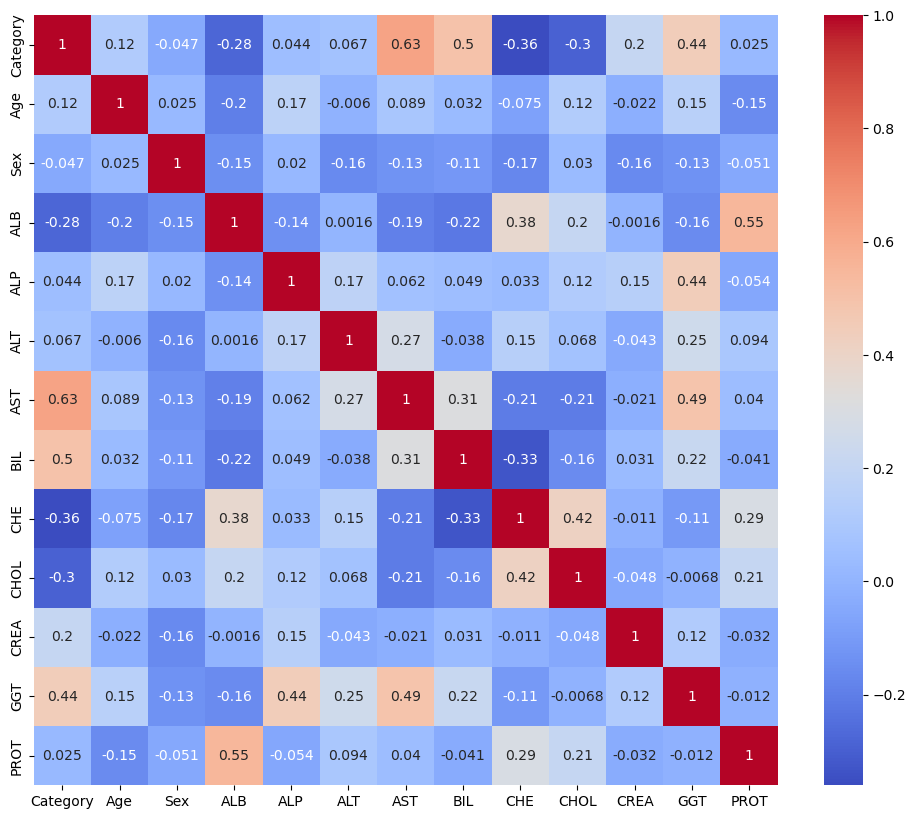

In [10]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, 
            cmap='coolwarm', 
            ax = ax
           )

     Category  Age  Sex   ALB   ALP   ALT   AST   BIL    CHE  CHOL  CREA  \
240         0   54    0  40.8  72.0  25.9  29.2   8.5   7.10  5.79  89.0   
195         0   50    0  46.6  66.3  19.5  23.7  18.5   8.27  5.73  92.0   
398         0   45    1  39.5  92.2  18.7  19.4   3.5   8.32  5.38  85.0   
104         0   41    0  40.2  48.2  37.0  34.9   9.2  11.35  5.56  78.0   
180         0   48    0  43.4  41.2  18.4  21.2   9.8   7.19  6.37  80.0   

      GGT  PROT  
240  15.6  67.9  
195  12.1  76.7  
398  15.8  72.2  
104  26.6  73.3  
180  15.8  68.9  
     Category  Age  Sex   ALB    ALP   ALT   AST   BIL   CHE  CHOL    CREA  \
20          0   33    0  44.3   49.8  32.1  21.6  13.1  7.44  5.59   103.0   
34          0   35    0  42.1   68.3  37.2  56.2  11.1  9.30  4.63    99.0   
169         0   47    0  46.2   63.0   7.0  17.4   6.5  7.06  5.23    60.0   
216         0   52    0  82.2   82.2  37.0  23.7   7.8  8.90  6.09    77.0   
591         3   46    0  35.0  109.6   2.3  1

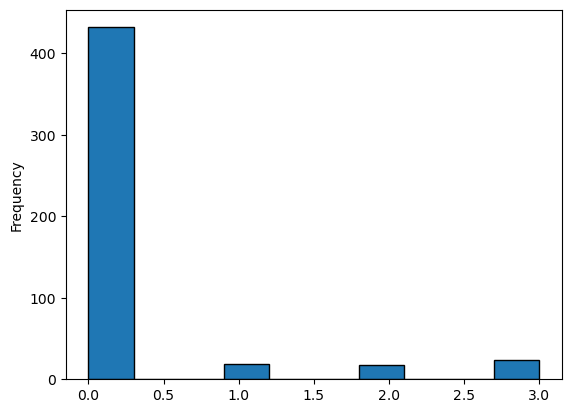

In [11]:
data_train, data_test = train_test_split(data, test_size=0.2, stratify = data['Category'], random_state=42)
X_train = data_train.copy()

print(data_train.head())
print(data_test.head())


X_train['Category'].plot(kind='hist', edgecolor='black')

counter_0 = len(X_train[X_train["Category"] == 0])
counter_1 = len(X_train[X_train["Category"] == 1])
counter_2 = len(X_train[X_train["Category"] == 2])
counter_3 = len(X_train[X_train["Category"] == 3])

y_train = X_train.pop("Category")

print(X_train.shape, y_train.shape)

X_test = data_test.copy()
y_test = X_test.pop("Category")
print(y_test.value_counts())
print(X_test.shape, y_test.shape)


     Category  Age  Sex        ALB        ALP        ALT         AST  \
0           0   49    0  21.600000  42.200000   9.500000   10.600000   
1           0   49    1  40.500000  31.300000  16.200000   19.400000   
2           0   54    0  40.800000  72.000000  25.900000   29.200000   
3           0   46    1  42.300000  61.900000  20.000000   21.800000   
4           0   34    0  43.600000  58.900000  47.100000   31.100000   
..        ...  ...  ...        ...        ...        ...         ...   
532         3   56    0  31.630282  68.431503   5.116373   86.323938   
533         3   59    0  37.928208  50.728378  14.455401  223.028743   
534         3   49    0  35.319203  88.238157  12.822197   89.521705   
535         3   58    0  35.473440  48.831177   7.780142  120.604862   
536         3   44    0  22.856646  72.702911  47.145443   99.288102   

            BIL       CHE      CHOL        CREA         GGT       PROT  
0      2.400000  3.750000  3.010000   64.000000   38.900000  4

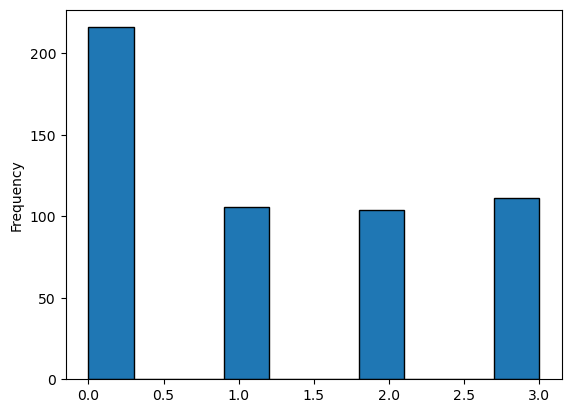

In [12]:
strategy_1 = {1:counter_1 + ceil(counter_0 * 0.2), 
              2:counter_2 + ceil(counter_0* 0.2), 
              3:counter_3 + ceil(counter_0* 0.2)}
strategy_2 = {0:ceil(counter_0*0.5)}


over = SMOTE(sampling_strategy=strategy_1)
under = RandomUnderSampler(sampling_strategy=strategy_2)

steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

X_bal, y_bal = pipeline.fit_resample(X_train, y_train)
result = pd.concat([y_bal, X_bal], axis=1, join='inner')

result['Category'].plot(kind='hist', edgecolor='black')
print(result)

In [13]:
data_test.to_csv('../Data/Test_set.csv',index=False)
result.to_csv('../Data/Train_set.csv',index=False)